In [1]:
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import jinja2

In [115]:
custom_na_values = ["Sin información", "Sin informacion", 'Na', "Nd", 'No aplica']

In [114]:
other_na_values = custom_na_values + ['No identificado', 'No identificada', 
                                      "Desconocido", "Desconocida", "Otro", "Otra"]

In [87]:
df = pd.read_csv("../data/memoria_historica/victimas_asesinatos_selectivos.csv", na_values=custom_na_values)

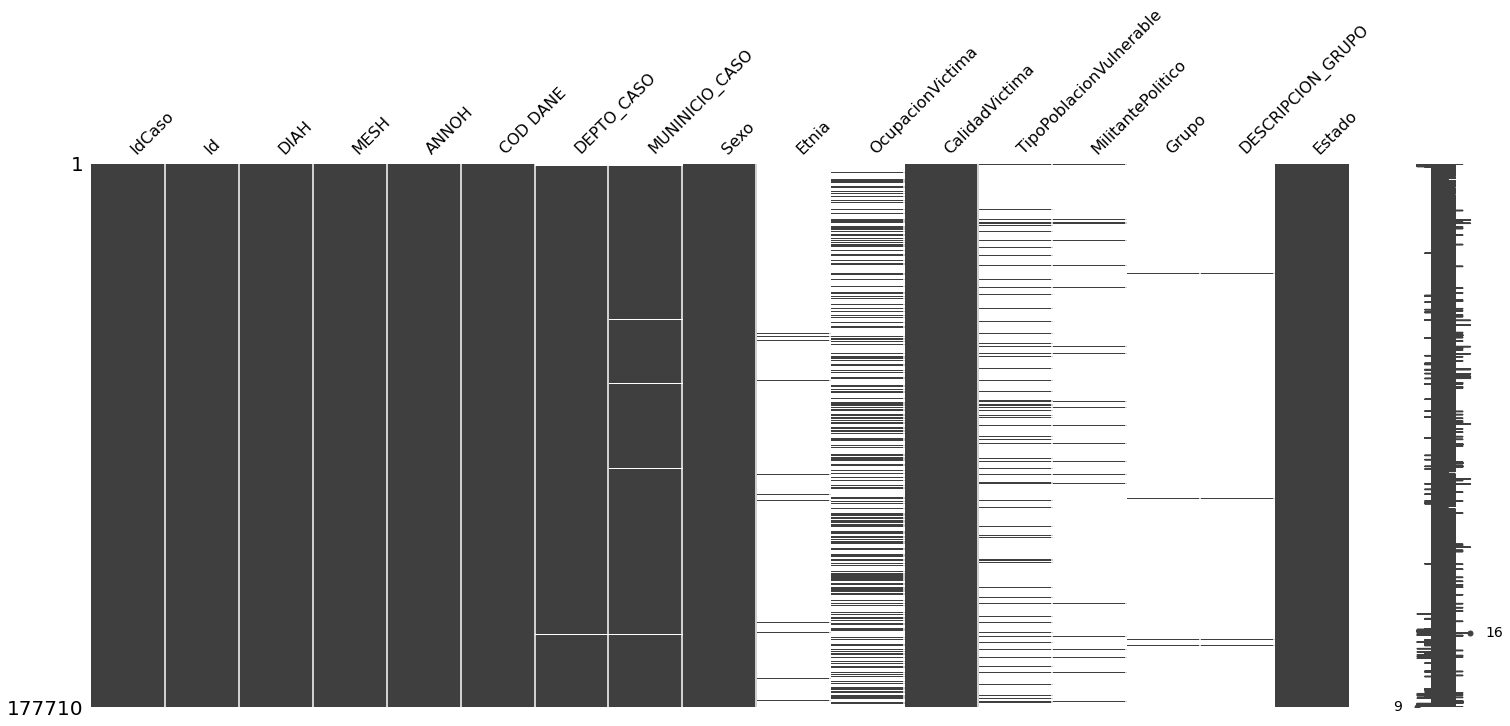

In [88]:
msno.matrix(df)
plt.savefig("missing_data.png", pad_inches=2)

In [112]:
def generate_null_plot(df, dataset_name):
    msno.matrix(df)
    plt.title("Null Diagram")
    filename = f"reports/{dataset_name}_null.png"
    plt.savefig(filename, bbox_inches='tight')
    return filename

In [97]:
def get_null_percent(vec):
    null_percent = vec.isna().mean() * 100
    return f"{null_percent:.2f}%"

In [149]:
def custom_describe_columns(df):
    output_data = []
    for col_name, col_type in df.dtypes.to_frame().reset_index().values:
        col_data = {
            "name": col_name, 
            "type": col_type,
            "range": ""
        }
        if col_type == "int64":
            mn = df[col_name].min()
            mx = df[col_name].max()
            range_str = f"{mn} - {mx}"
            col_data["range"] = range_str
            
        elif col_type == "float64":
            mn = df[col_name].min()
            mx = df[col_name].max()
            null_percent = df[col_name].isna().mean() * 100
            range_str = f"{mn:.2f} - {mx:.2f}"
            col_data["range"] = range_str
            
        elif col_type == "object":
            pass

        col_data["null_percent"] = get_null_percent(df[col_name])
        common_values = df[col_name].value_counts().index.values
        common_values = common_values[:min(len(common_values), 3)]
        col_data["common_values"] = common_values
        
        col_data["unique_values"] = df[col_name].unique().shape[0]

        output_data.append(col_data)
    return output_data

In [150]:
def generate_report(dataset_name):
    df = pd.read_csv(f"../data/memoria_historica/{dataset_name}.csv", na_values=custom_na_values)
    # Metadata of the dataset
    rows, cols = df.values.shape
    dataset_data = {
        "dataset_name": dataset_name,
        "dataset_rows": f"{rows:,}",
        "dataset_cols": cols,
    }

    
    # Generate Null Plot
    generate_null_plot(df, dataset_name)
    dataset_data["null_img"] = f"{dataset_name}_null.png"
    
    # Get data from columns
    column_data = custom_describe_columns(df)
    
    # Generate HTML with Jinja
    templateLoader = jinja2.FileSystemLoader(searchpath="./")
    templateEnv = jinja2.Environment(loader=templateLoader)
    TEMPLATE_FILE = "preeda_template.html"
    template = templateEnv.get_template(TEMPLATE_FILE)
    outputText = template.render(column_data=column_data, **dataset_data)  # this is where to put args to the template renderer

    with open(f"reports/{dataset_name}.html", "w") as report_file:
        report_file.write(outputText)

casos_acciones_belicas
casos_asesinatos_selectivos
casos_ataques_poblaciones
casos_atentados_terroristas
casos_danos_bienes
casos_desaparicion
casos_map_muse
casos_masacres
casos_reclutamiento
casos_secuestro
casos_violencia_sexual
victimas_acciones_belicas
victimas_asesinatos_selectivos
victimas_ataques_poblaciones
victimas_atentados_terroristas
victimas_danos_bienes
victimas_desaparicion
victimas_map_muse
victimas_masacres
victimas_reclutamiento


C:\Users\juanj\.conda\envs\enfasis\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


victimas_secuestro


C:\Users\juanj\.conda\envs\enfasis\lib\site-packages\missingno\missingno.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


victimas_violencia_sexual


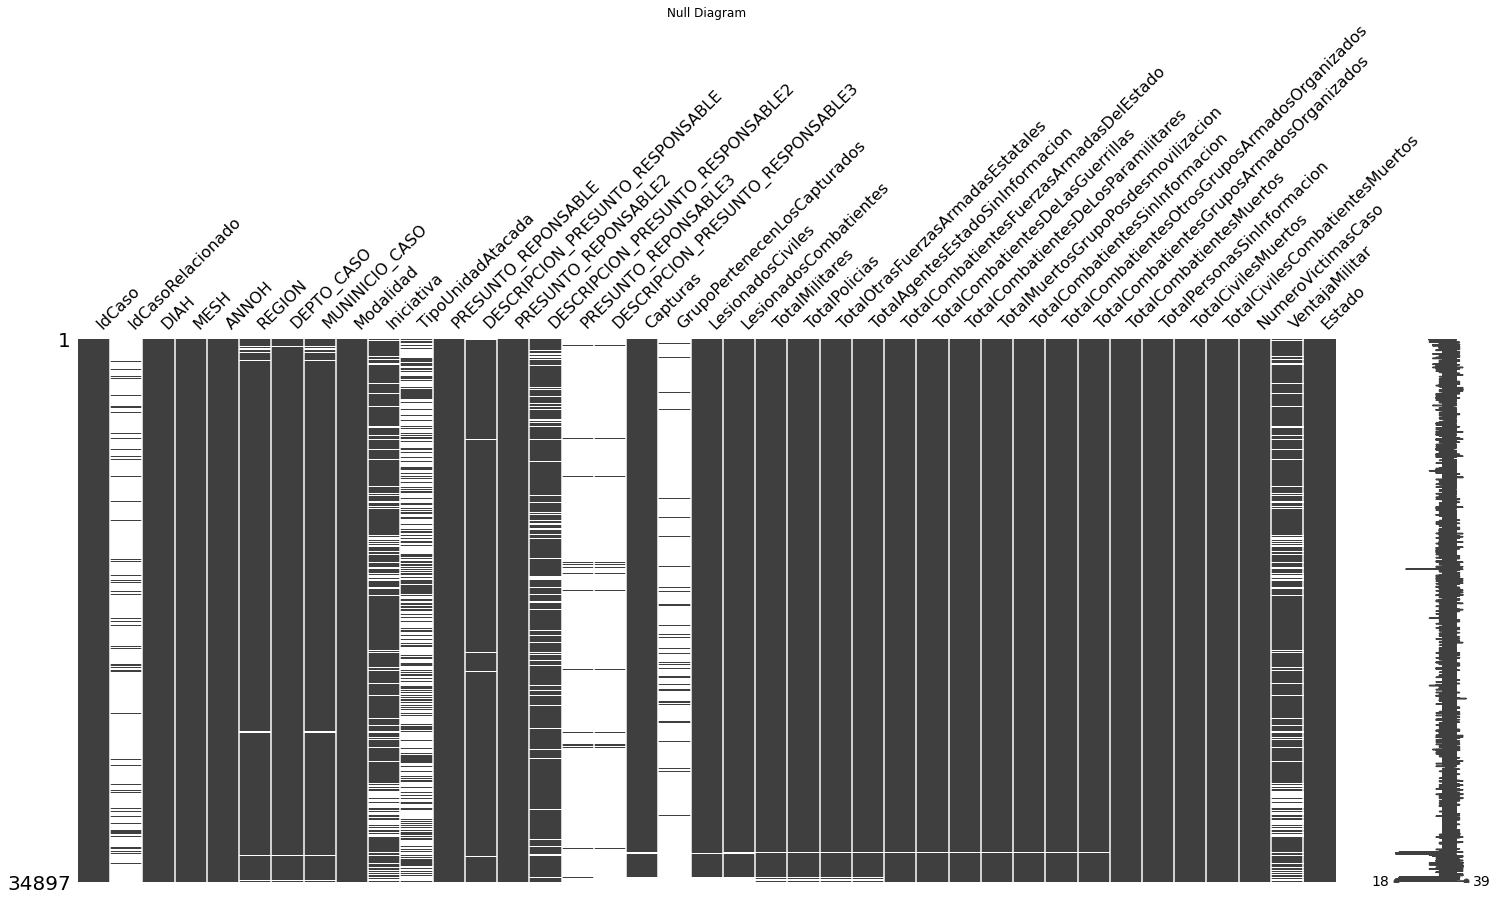

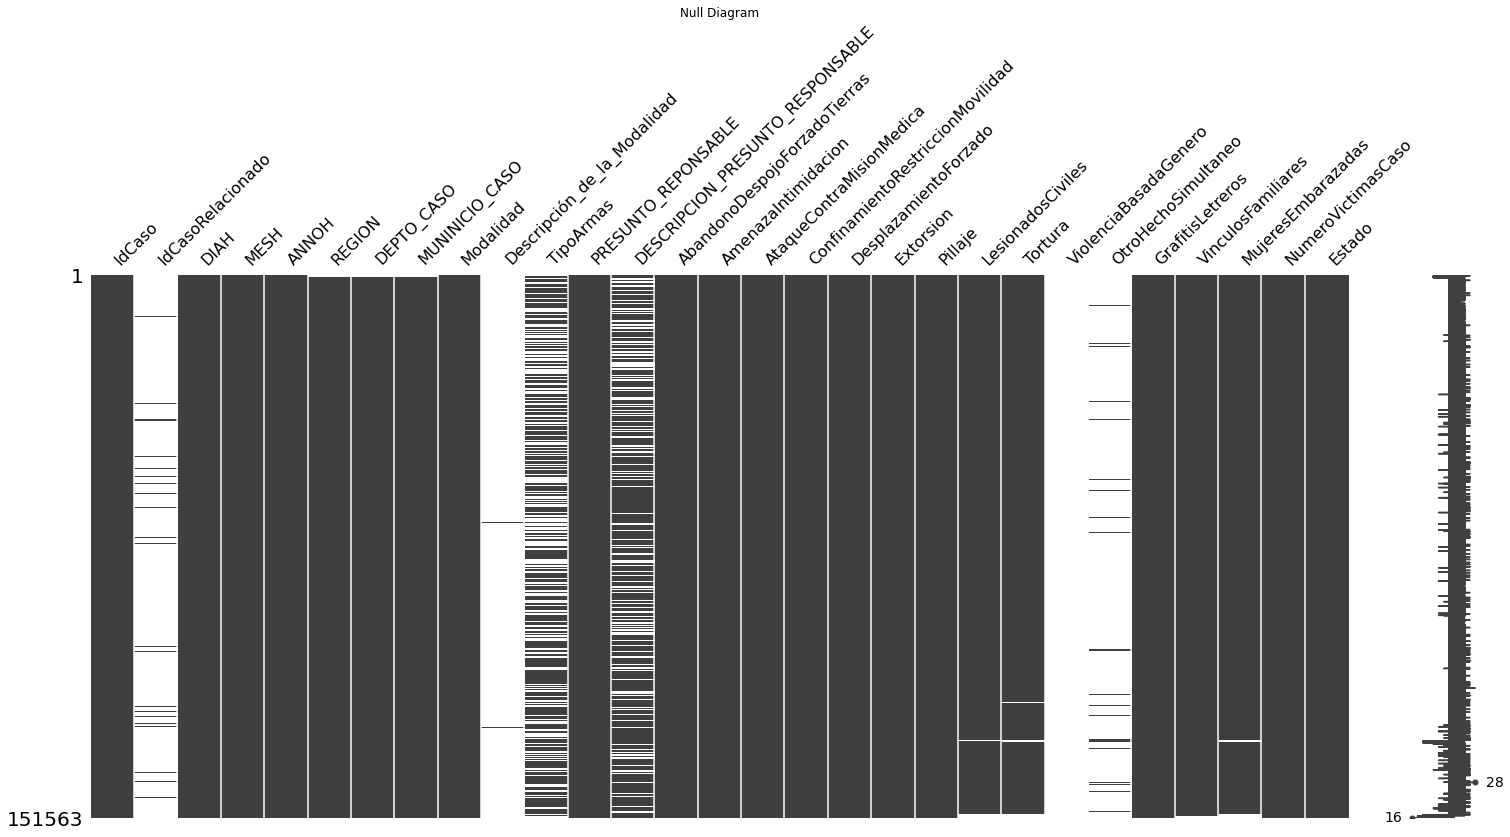

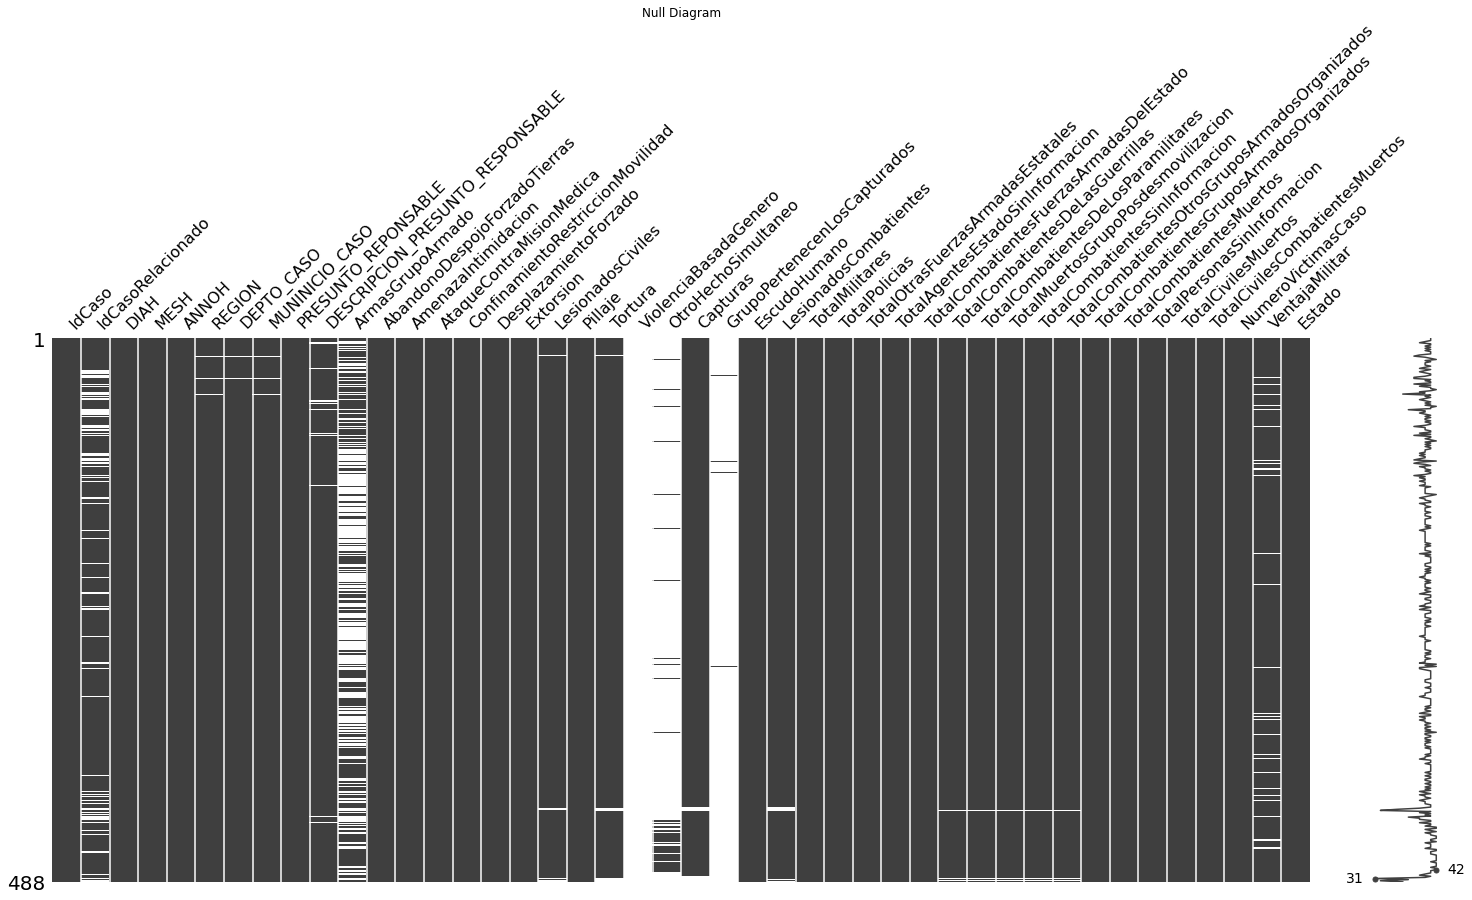

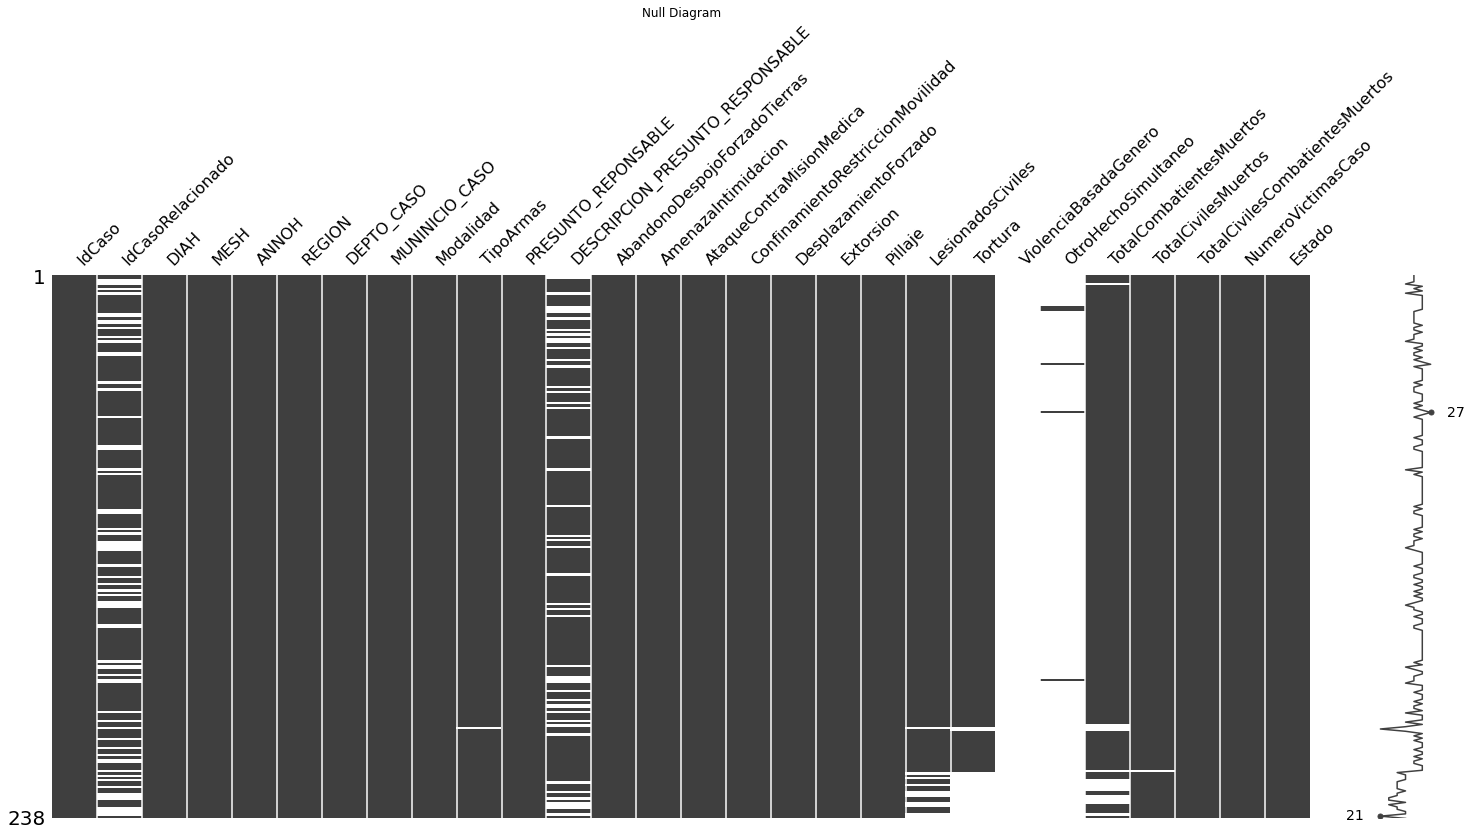

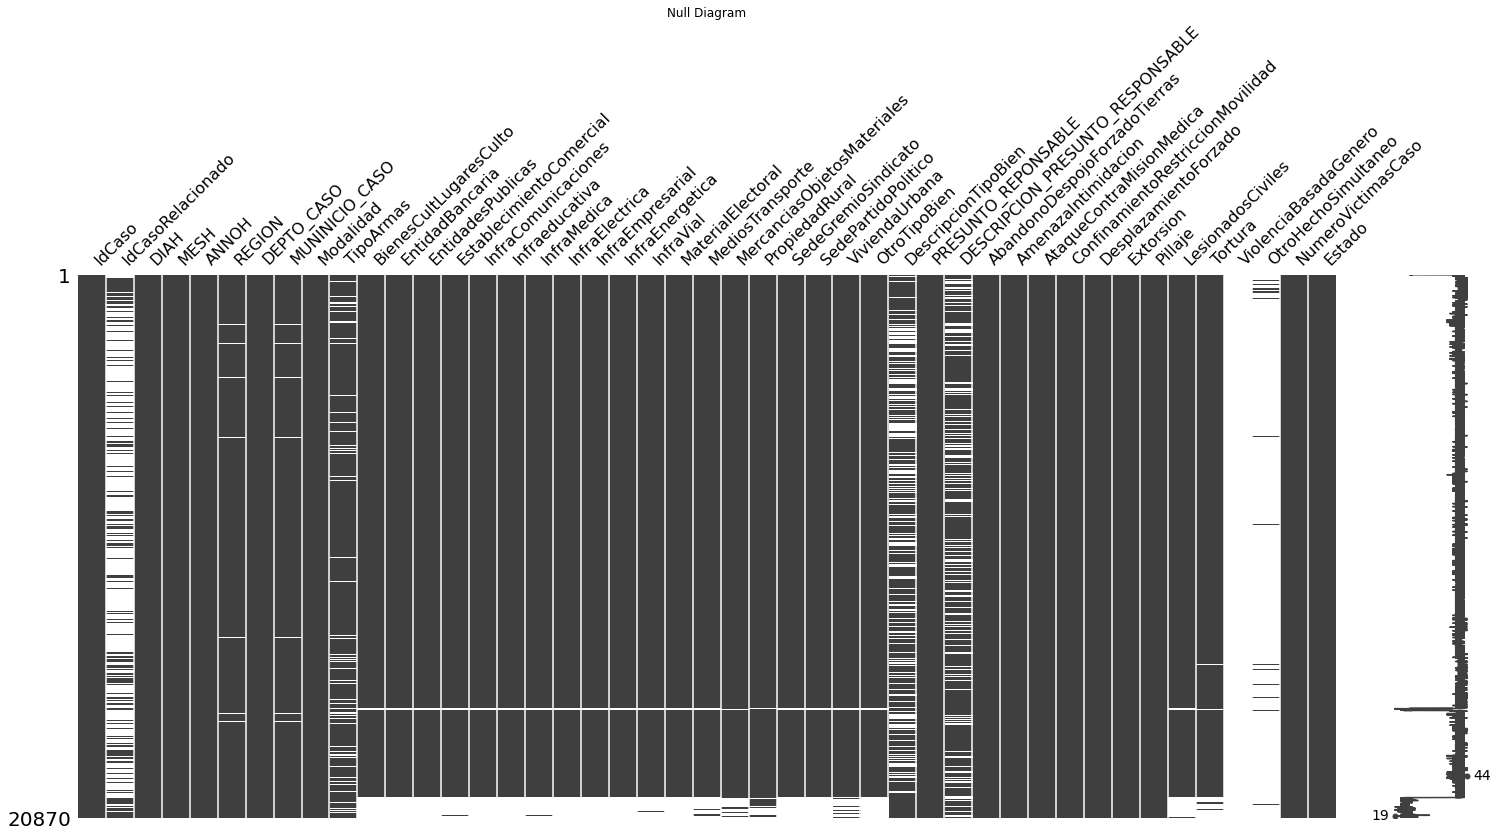

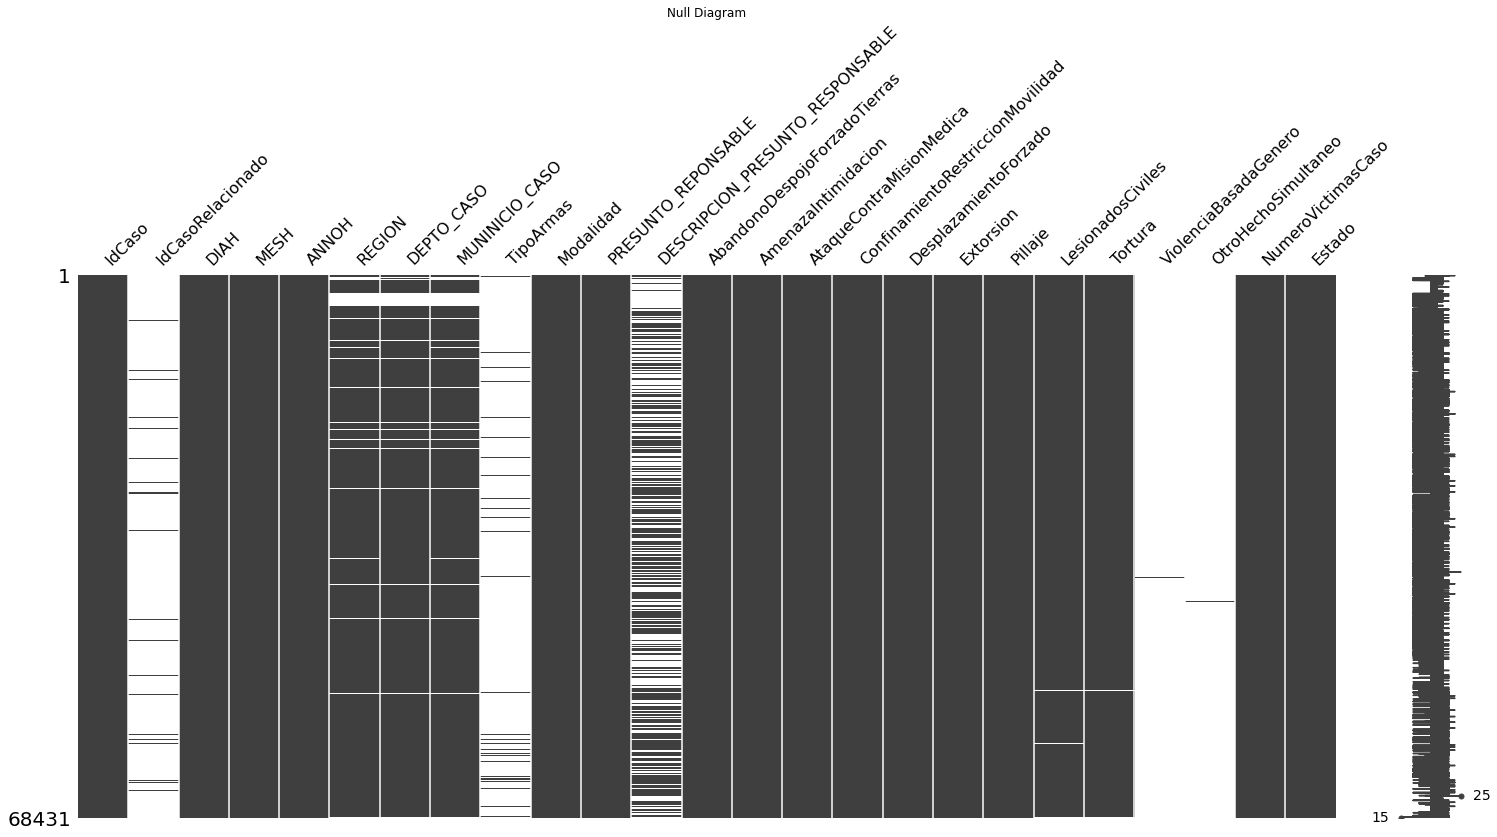

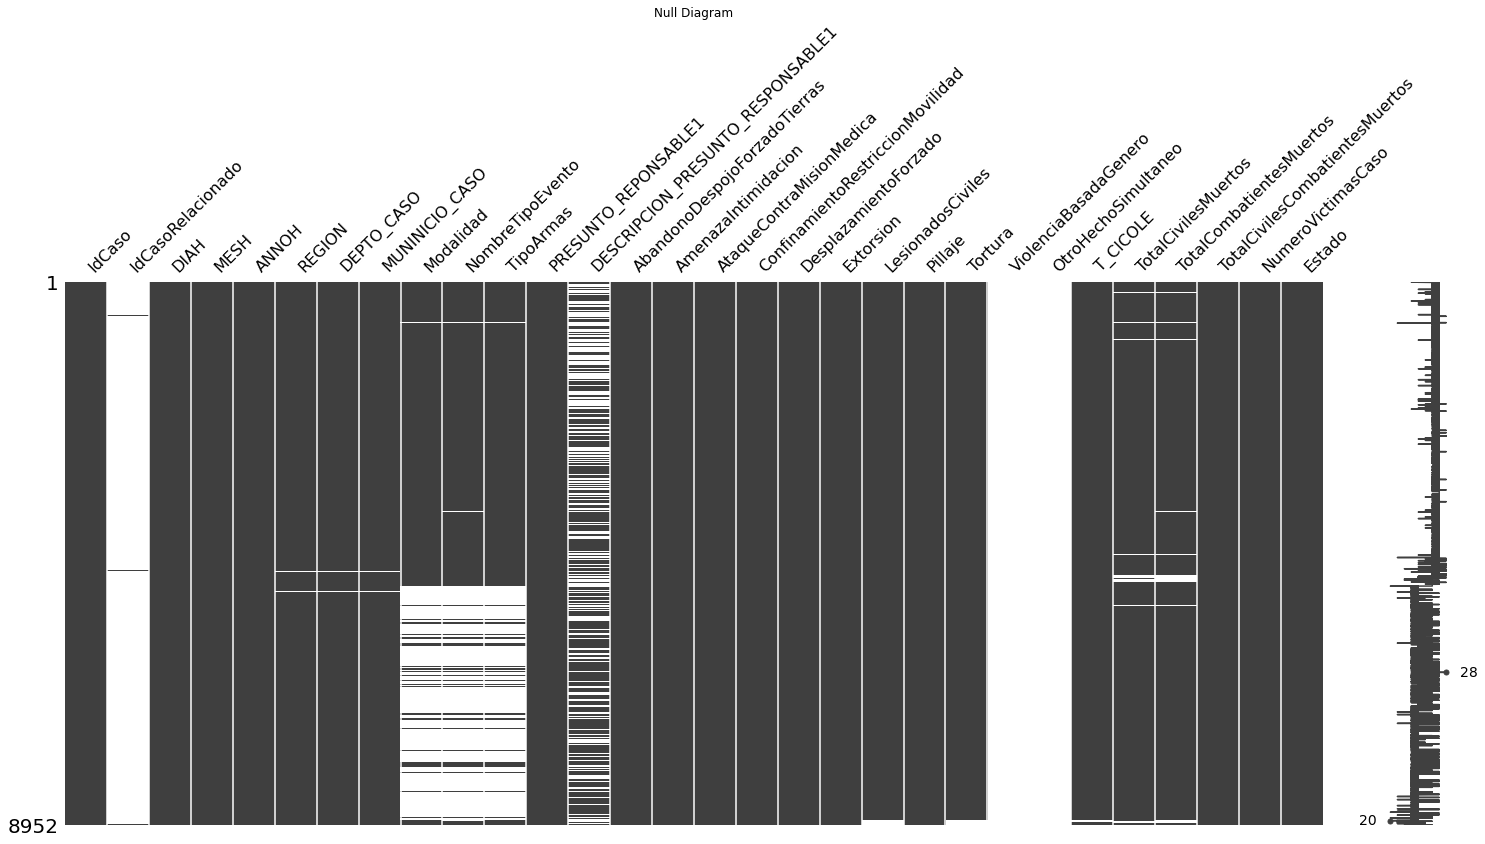

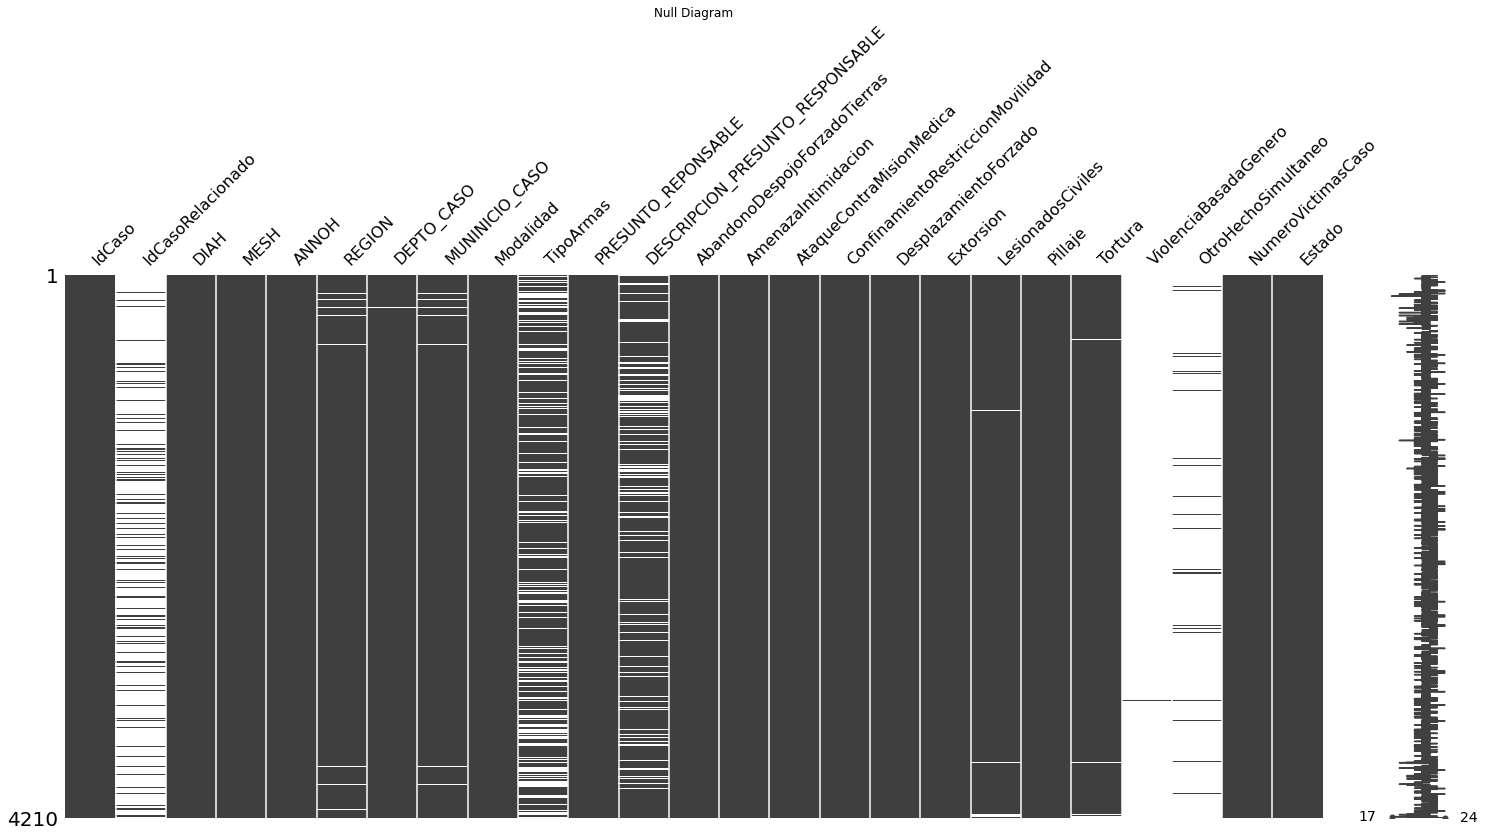

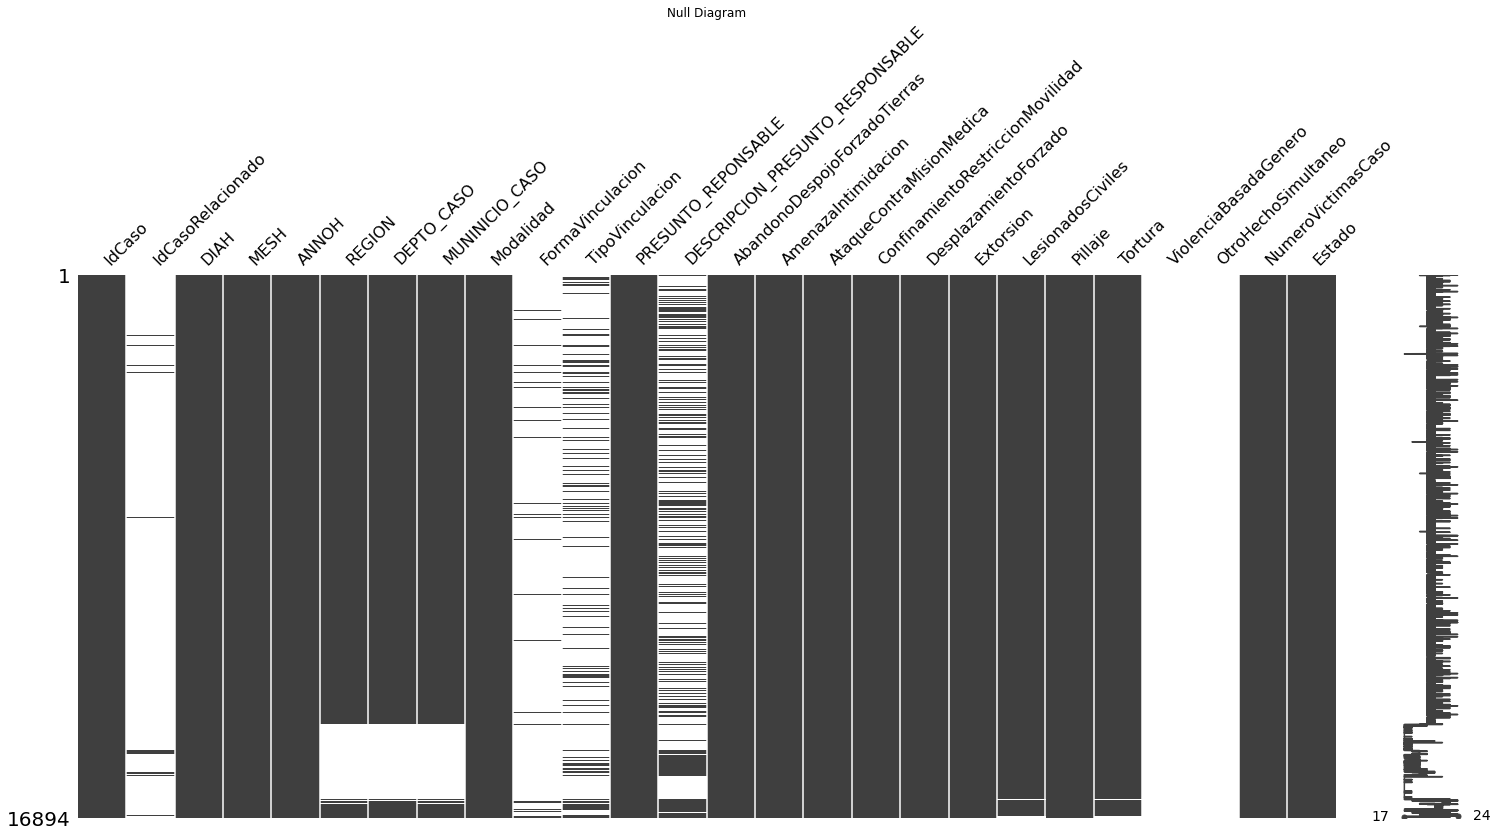

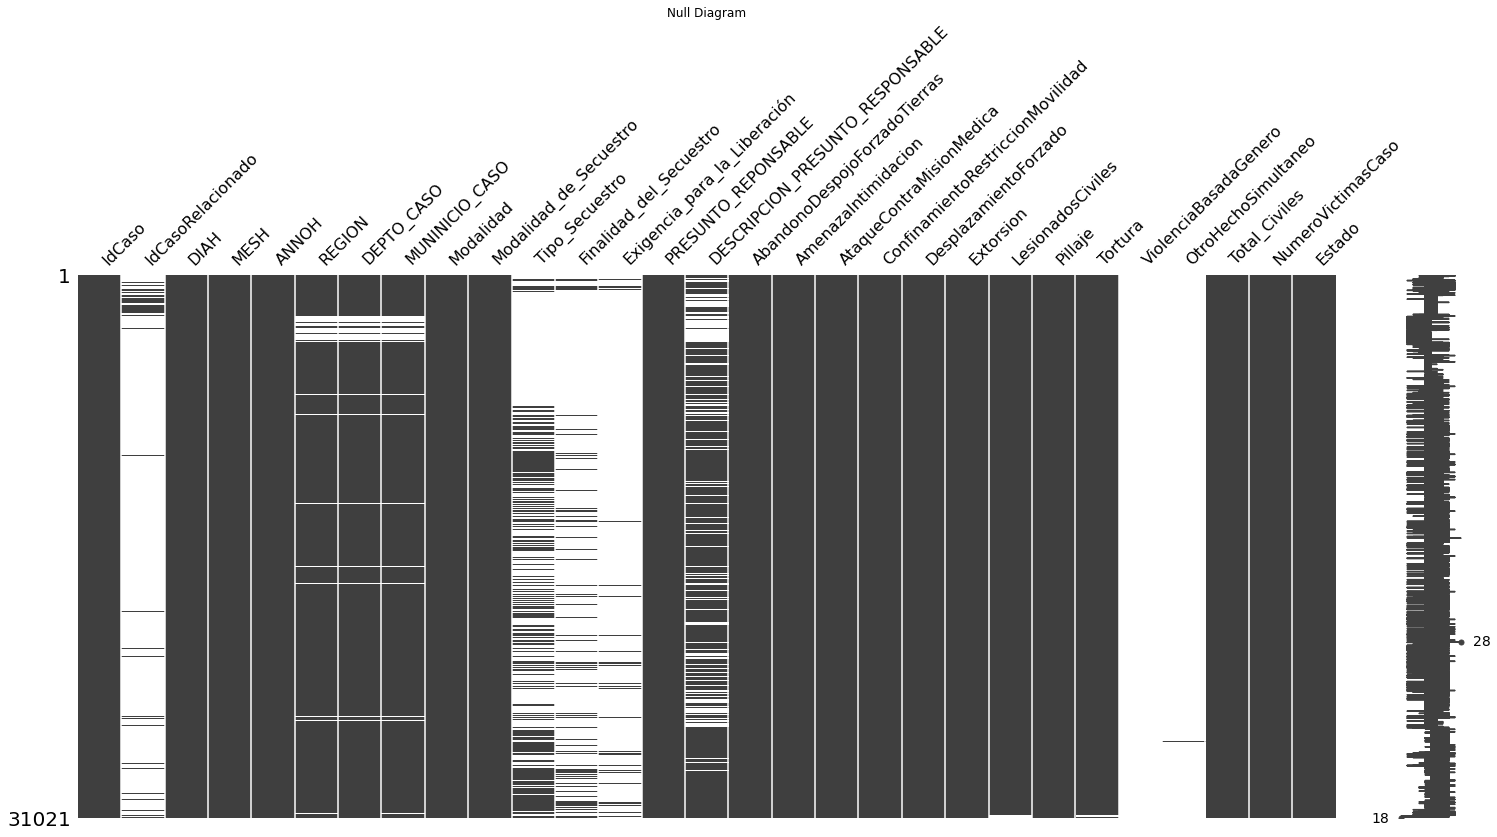

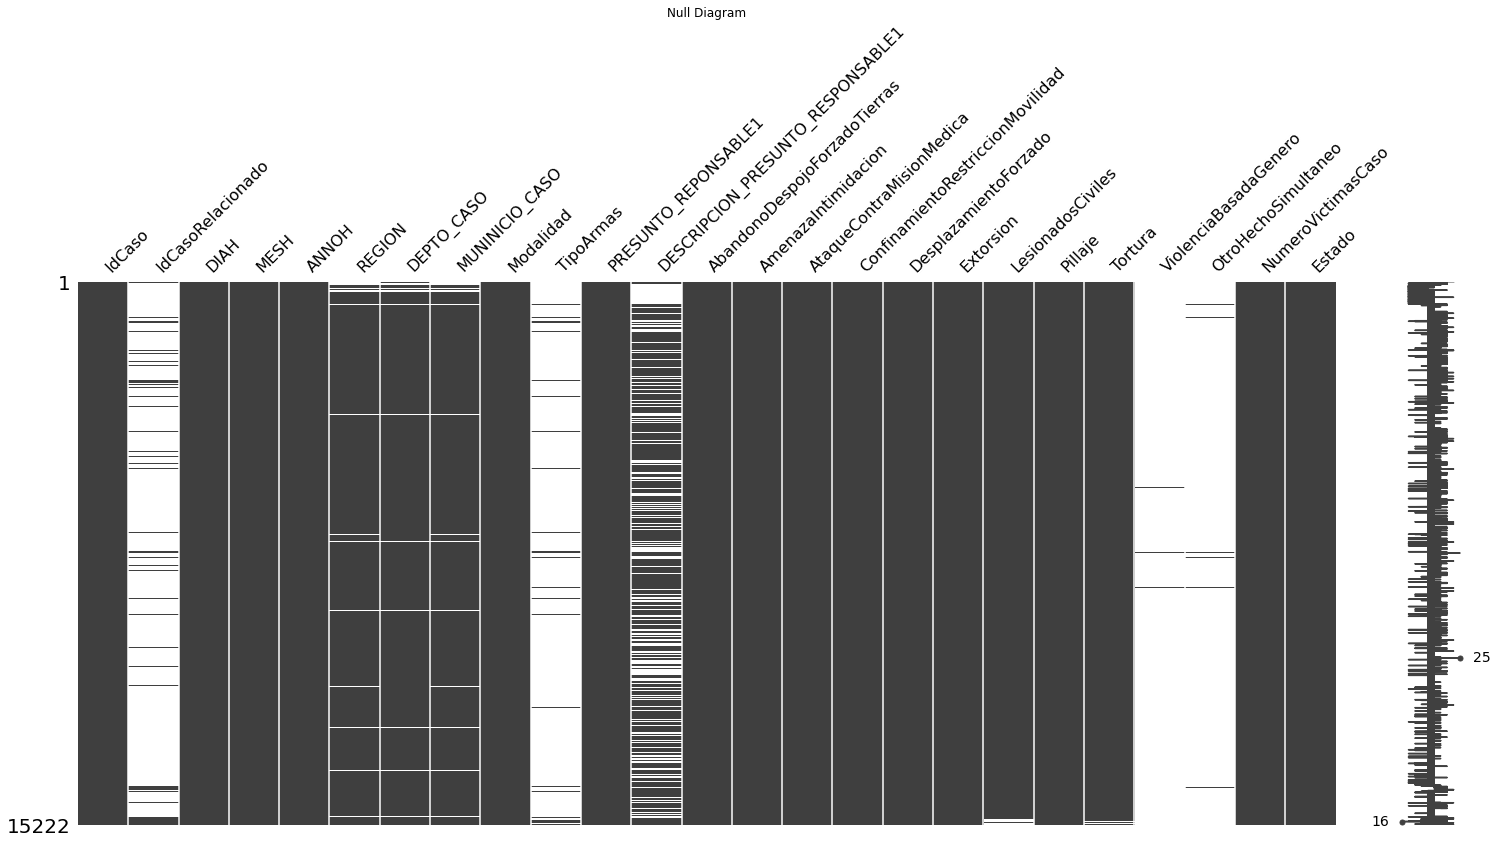

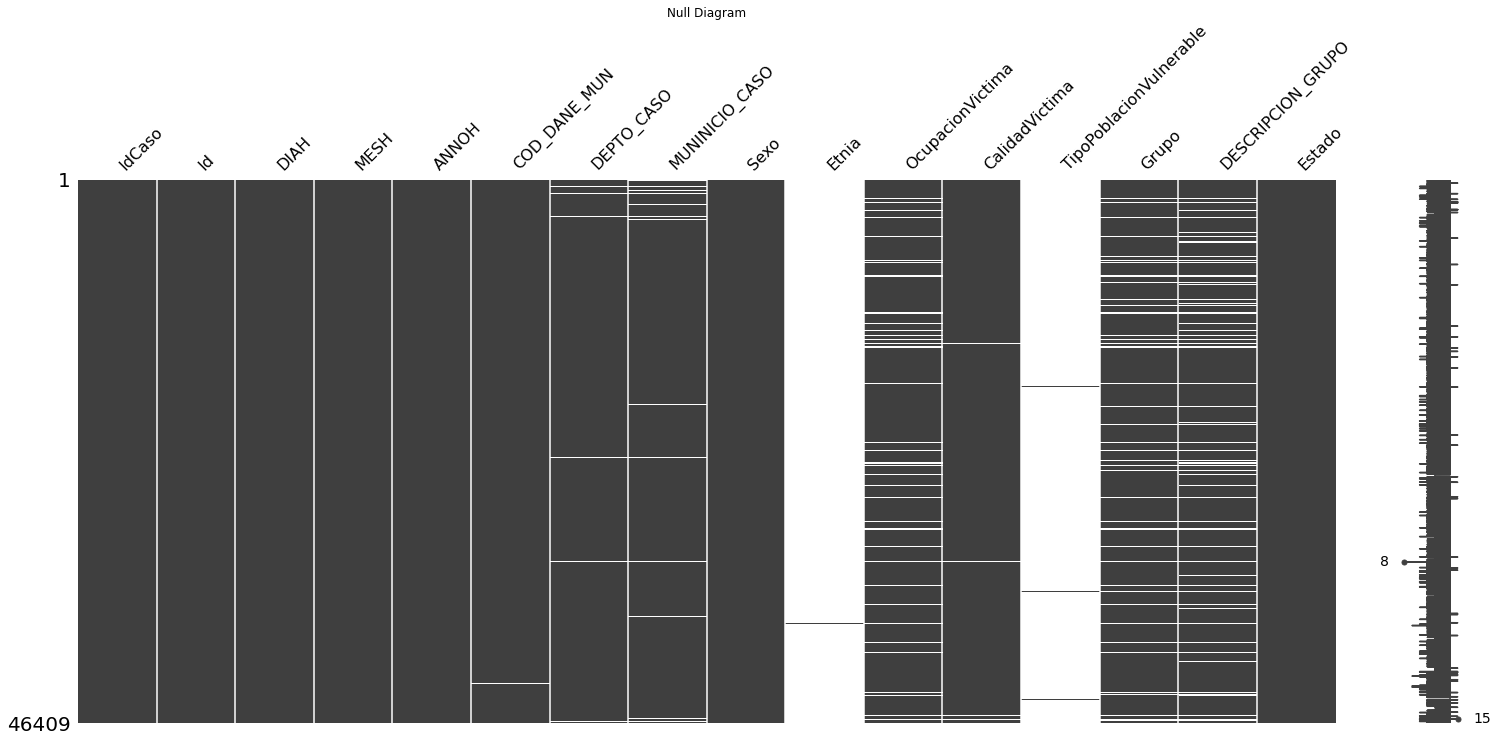

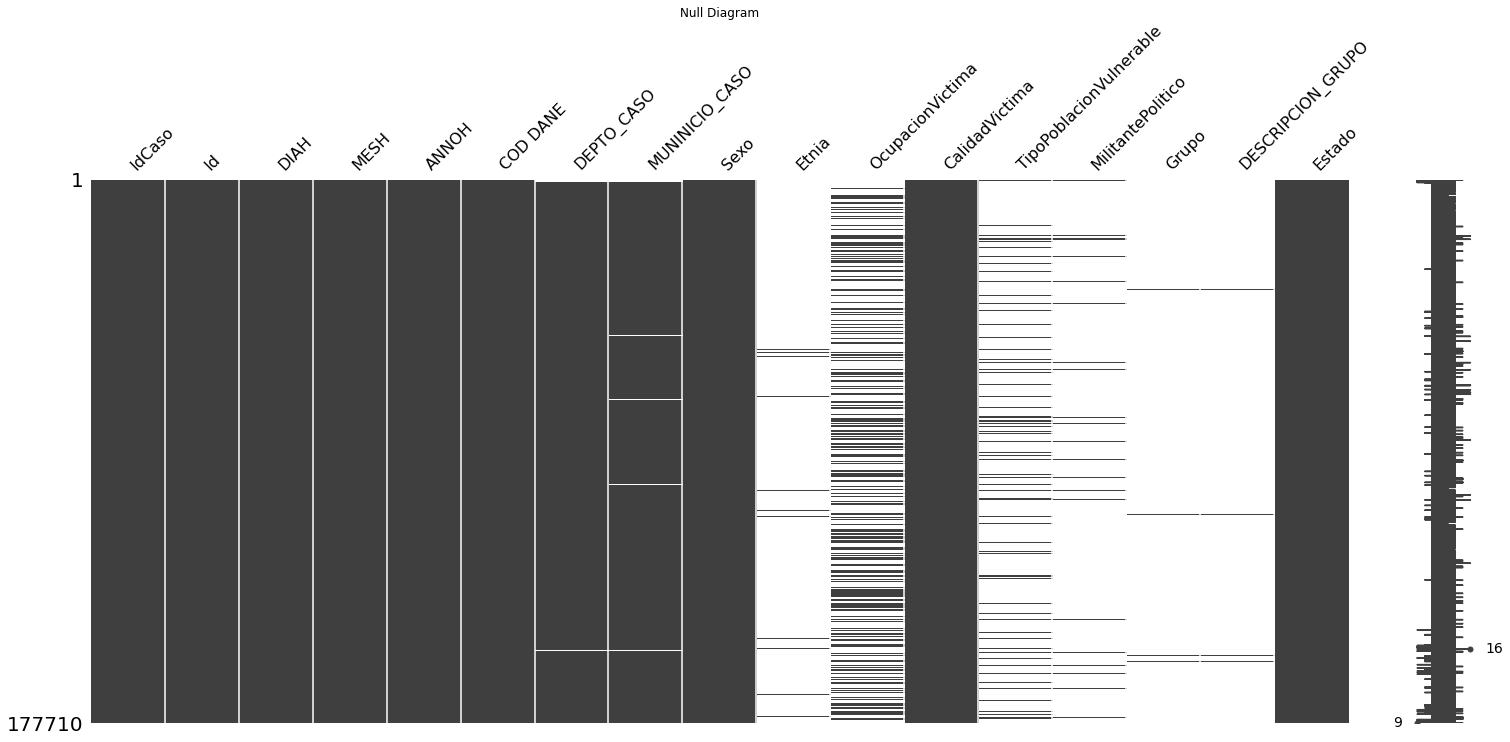

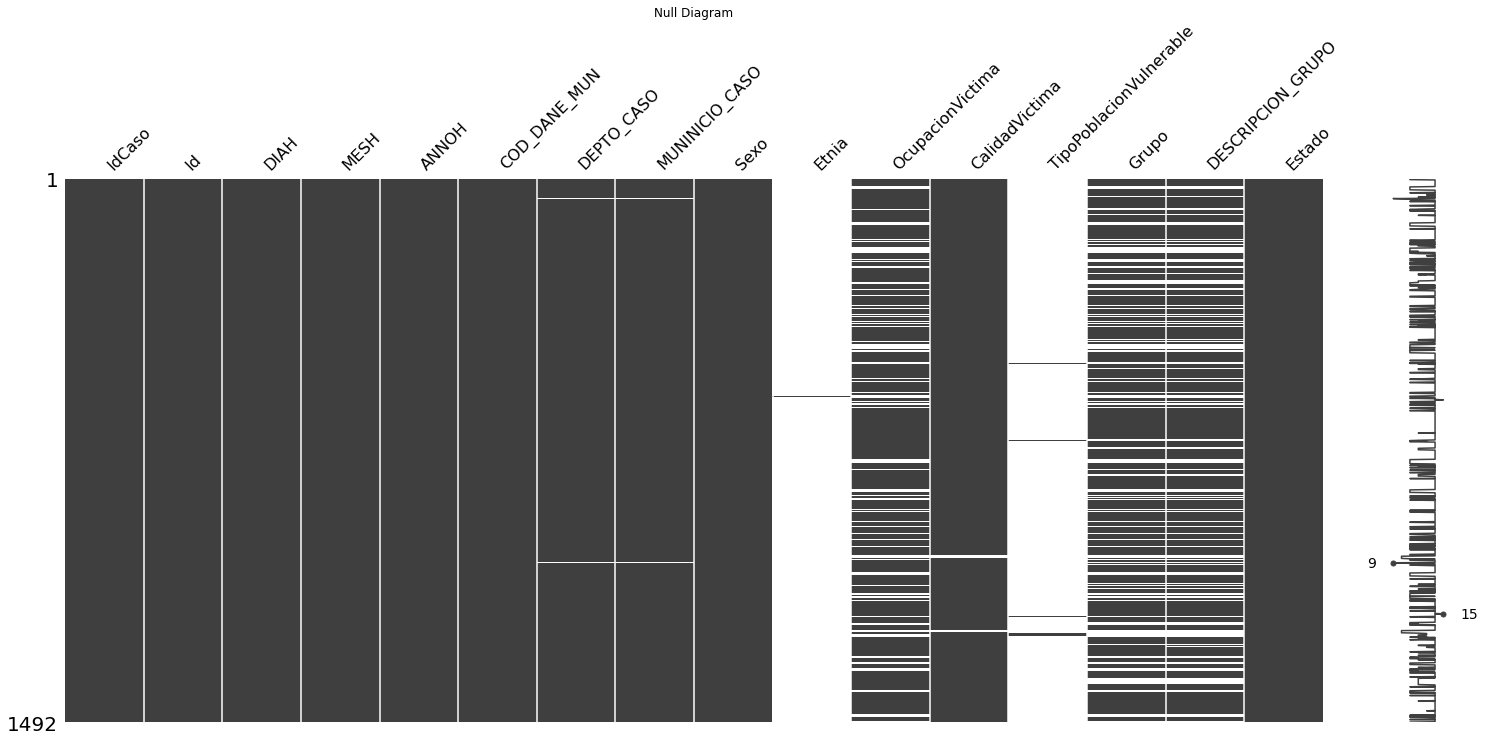

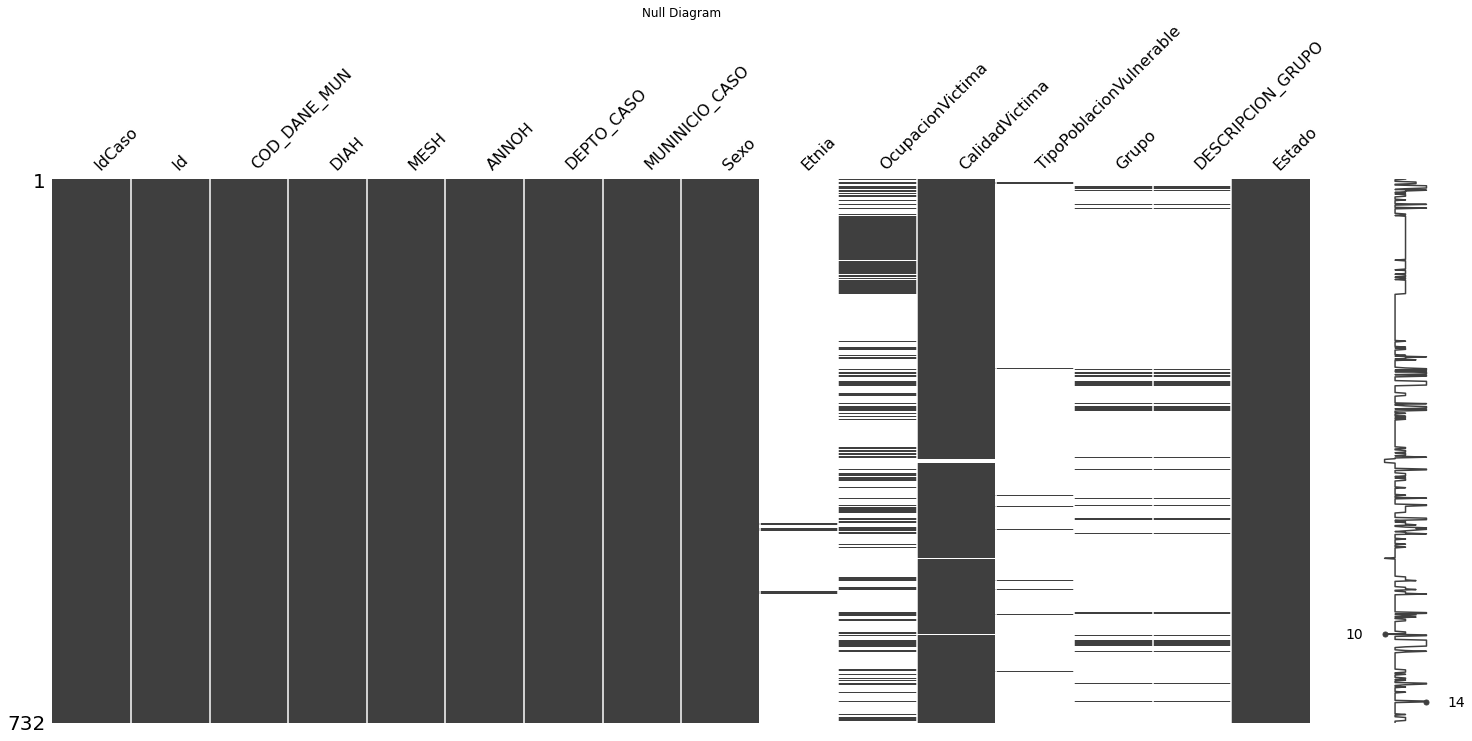

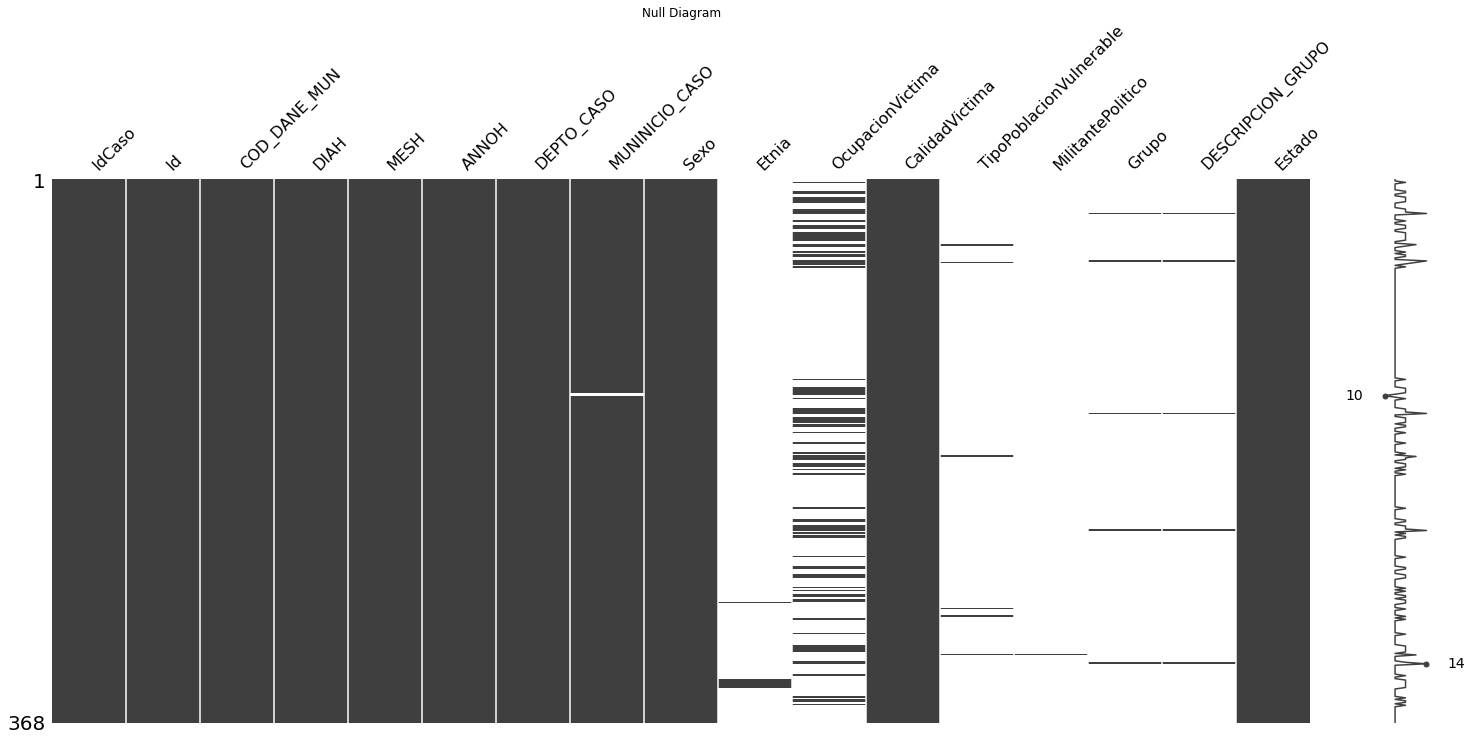

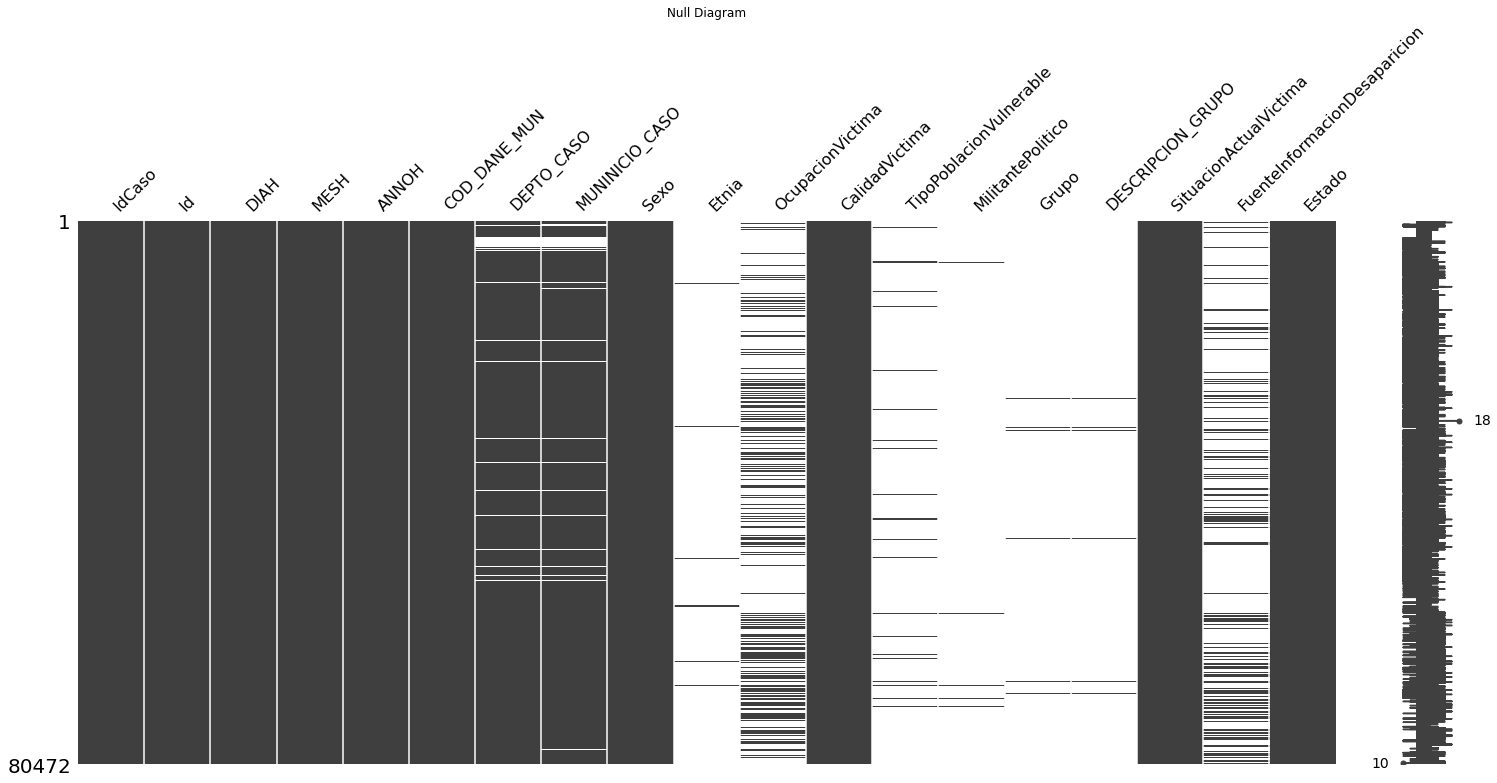

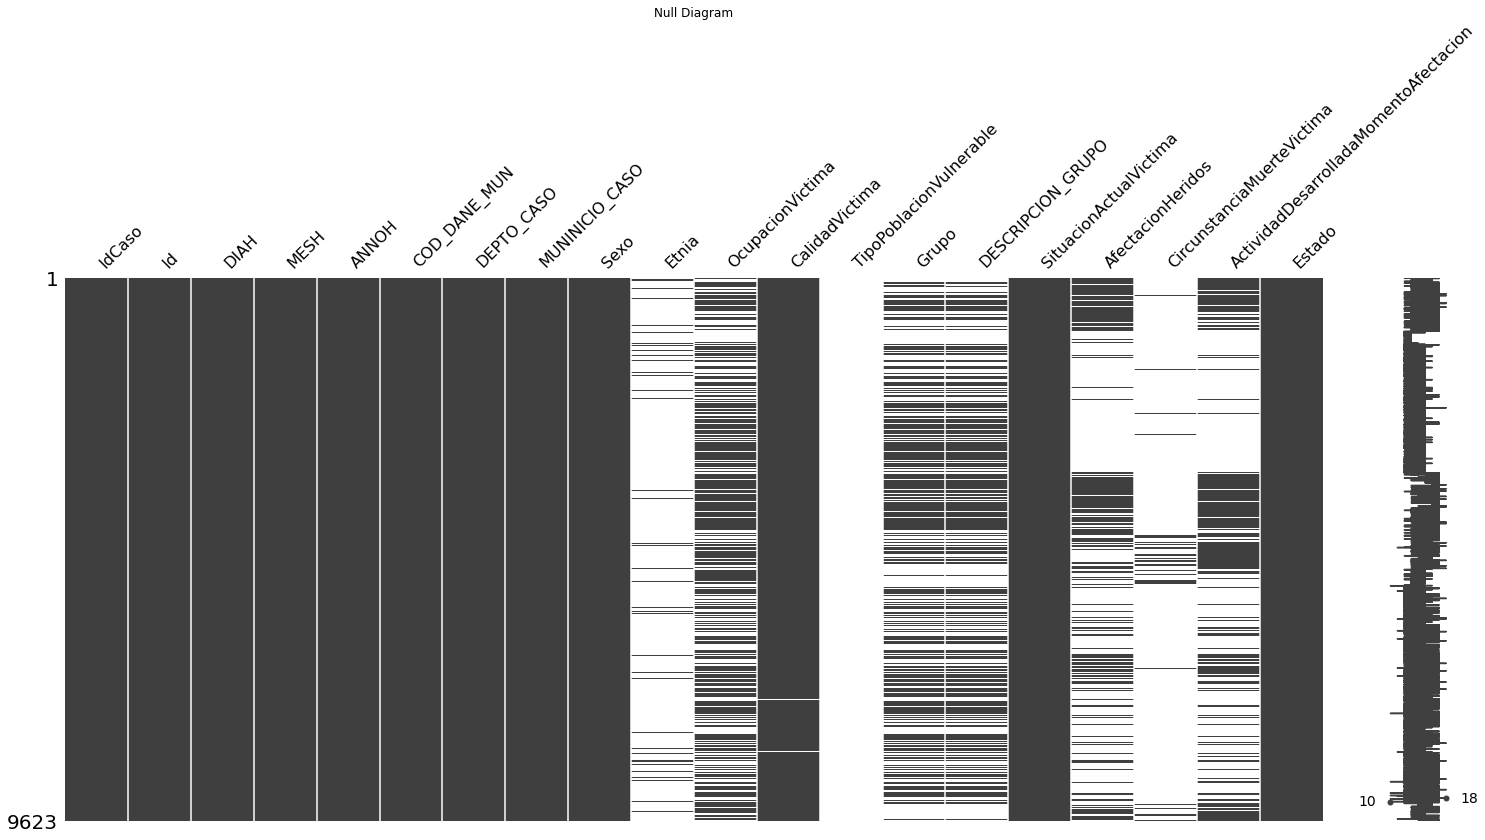

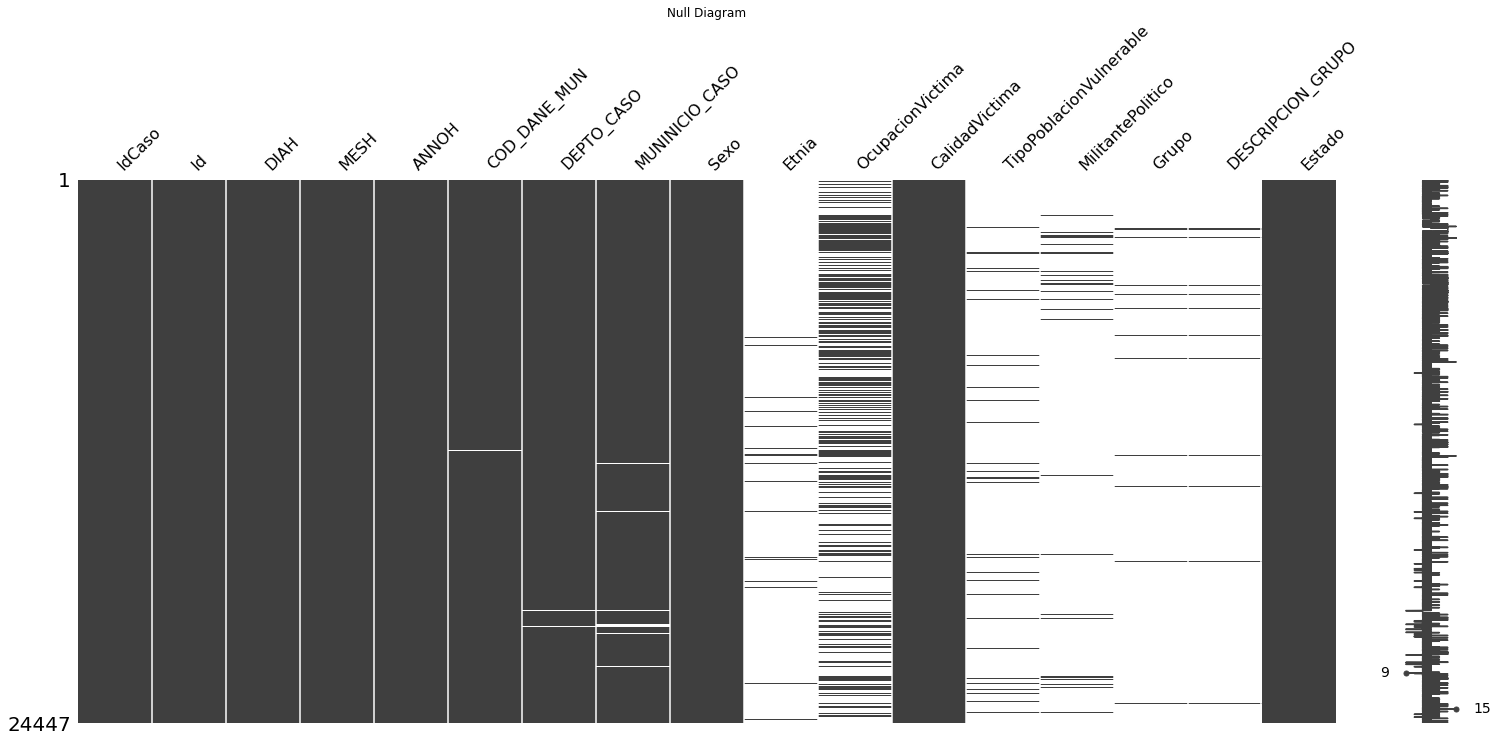

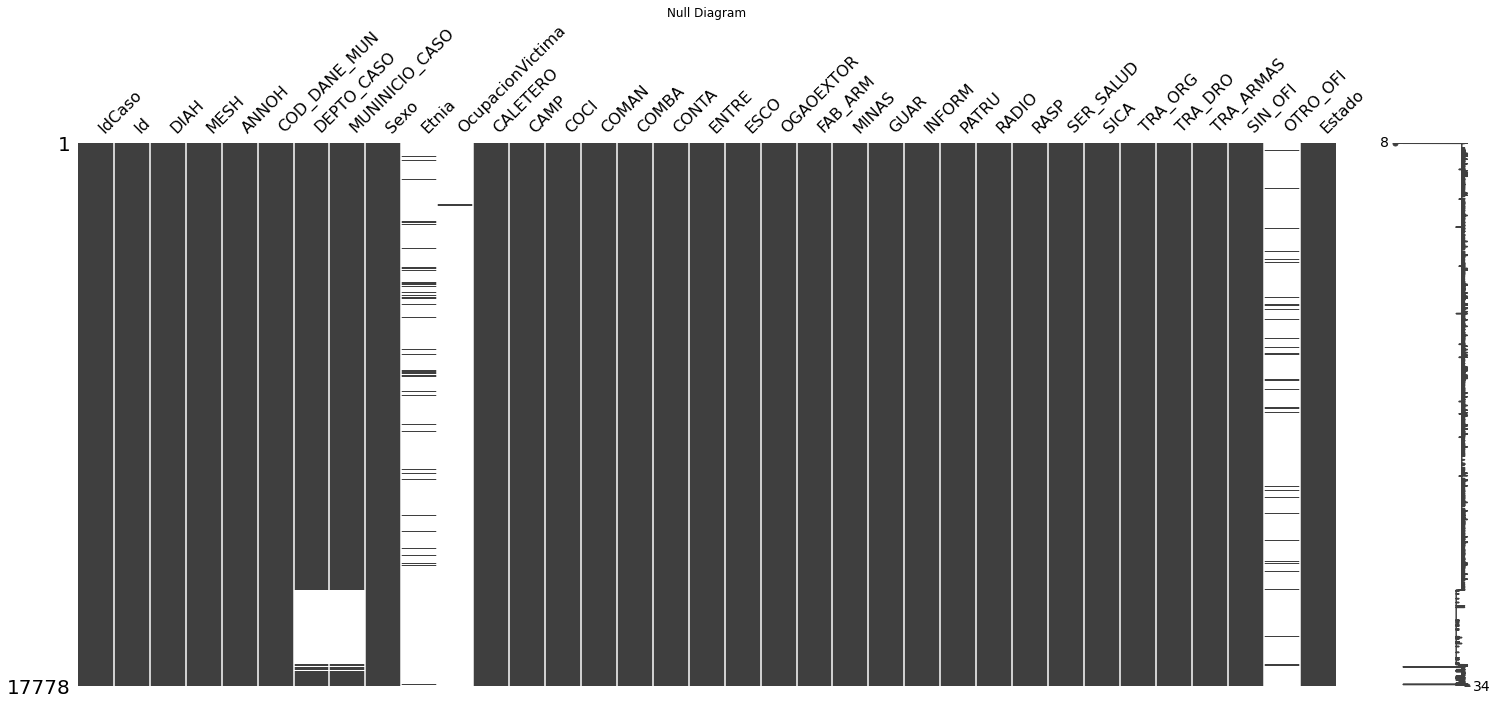

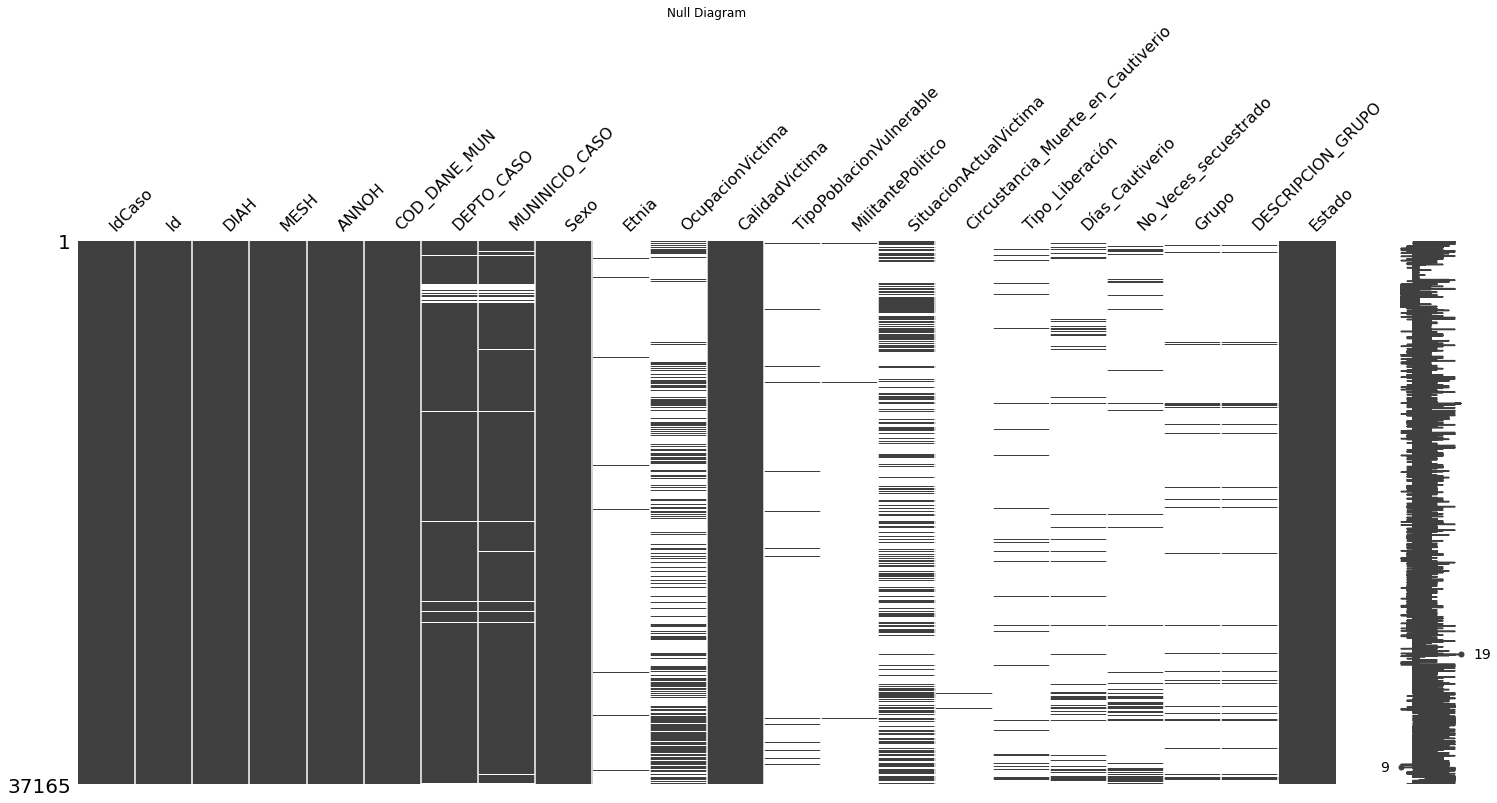

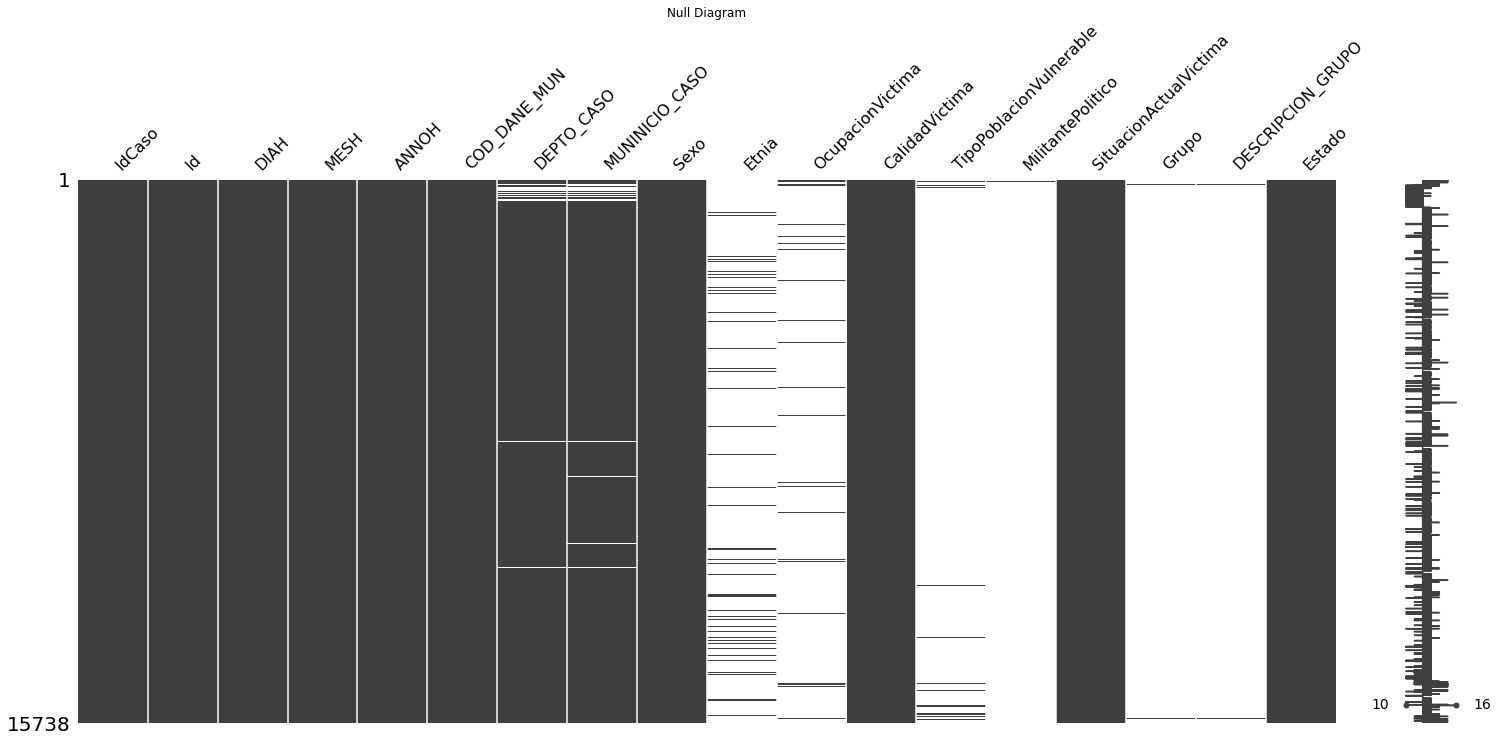

In [152]:
import os
if not os.path.exists("reports"):
    os.makedirs("reports")
for file in os.listdir(path='../data/memoria_historica'):
    filename, file_extension = os.path.splitext(file)
    print(filename)
    generate_report(filename)

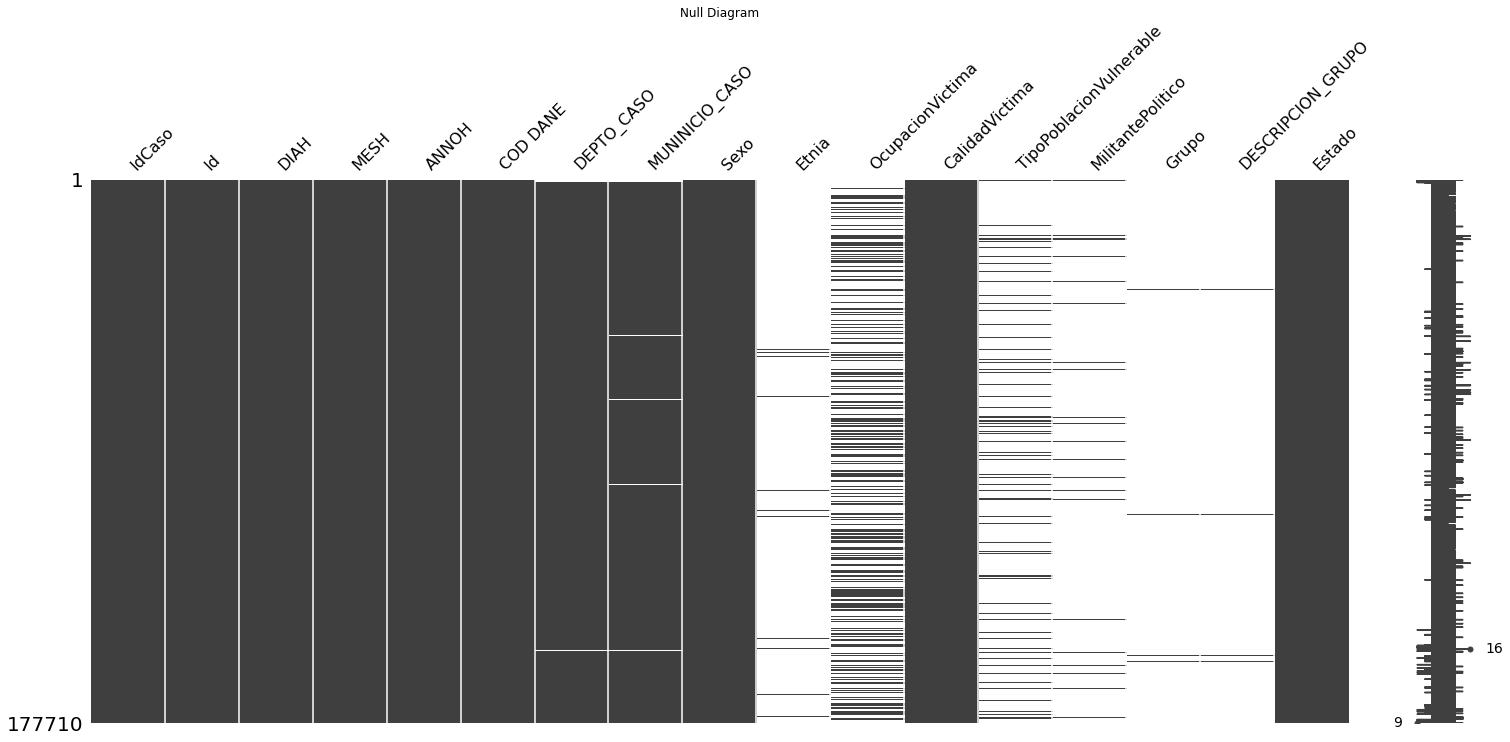

In [151]:
generate_report("victimas_asesinatos_selectivos")

In [18]:
df["GrupoPertenecenLosCapturados"].unique()

array([nan, 'Auc - bloque córdoba', 'Paramilitares', 'Bandolerismo',
       'Civil temporalmente combatiente', 'Bandoleros', 'Desconocido',
       'Otro', 'Bandolerismo liberal', 'Banda "caballito"', 'Guerrilla',
       'Banda sangre negra', 'Banda de "despiste"', 'Bandoleros la gata',
       'Banda "arturito"', 'Bandolero', 'Guerrillero', 'Eln', 'Gani',
       'Guerrilleros', 'Bandoleros y civiles', 'Civiles', 'Epl',
       'Grupo armado no identificado', 'Farc', 'Desconocida', 'M-19',
       'Guerrila epl', 'Guerrilla no identificada', 'M - 19',
       'Guerrilla regional del café', 'Comando ricardo franco',
       'Disidencia farc ricardo franco', 'No identificado',
       'Coordinadora nacional guerrillera', 'Quintin lame',
       'Guerrilla - farc', 'Policía-civil', 'Delincuencia comun',
       'Coordinadora guerrillera simón bolívar', 'Desconocidos',
       'Disidencia epl', 'No identificada', 'Milicias populares uc-eln',
       'Autodefensas campesinas de casanare', 'Parmailitar

In [125]:
os.listdir(path='../data/memoria_historica')

['casos_acciones_belicas.csv',
 'casos_asesinatos_selectivos.csv',
 'casos_ataques_poblaciones.csv',
 'casos_atentados_terroristas.csv',
 'casos_danos_bienes.csv',
 'casos_desaparicion.csv',
 'casos_map_muse.csv',
 'casos_masacres.csv',
 'casos_reclutamiento.csv',
 'casos_secuestro.csv',
 'casos_violencia_sexual.csv',
 'victimas_acciones_belicas.csv',
 'victimas_asesinatos_selectivos.csv',
 'victimas_ataques_poblaciones.csv',
 'victimas_atentados_terroristas.csv',
 'victimas_danos_bienes.csv',
 'victimas_desaparicion.csv',
 'victimas_map_muse.csv',
 'victimas_masacres.csv',
 'victimas_reclutamiento.csv',
 'victimas_secuestro.csv',
 'victimas_violencia_sexual.csv']

In [134]:
df2 = pd.read_csv("../data/memoria_historica/victimas_danos_bienes.csv", na_values=custom_na_values)
df1 = pd.read_csv("../data/memoria_historica/casos_danos_bienes.csv", na_values=custom_na_values)

In [135]:
df1

,IdCaso,IdCasoRelacionado,DIAH,MESH,ANNOH,REGION,DEPTO_CASO,MUNINICIO_CASO,Modalidad,TipoArmas,...,ConfinamientoRestriccionMovilidad,DesplazamientoForzado,Extorsion,Pillaje,LesionadosCiviles,Tortura,ViolenciaBasadaGenero,OtroHechoSimultaneo,NumeroVictimasCaso,Estado
0,61596.0,Cr040147,4,11,1995,Occidente antioqueño,Antioquia,Dabeiba,Ataque a propiedad,Objeto contundente,...,0,0,0,0,0.0,0.0,NaN,NaN,0,Publicado
1,61964.0,Cr040149,12,8,1993,Occidente antioqueño,Antioquia,Ebéjico,Ataque a propiedad,Objeto contundente,...,0,0,0,0,0.0,0.0,NaN,NaN,0,Publicado
2,98013.0,Cr034068,10,10,2000,Norte de cordoba,Córdoba,Momil,Ataque a propiedad,Objeto contundente,...,0,0,0,0,0.0,1.0,NaN,NaN,0,Publicado
3,121948.0,Cr040117,9,7,2002,Suroriente de norte de santander,Norte de santander,Toledo,Quema de vehículos,NaN,...,0,0,0,0,0.0,0.0,NaN,NaN,0,Publicado
4,130005.0,Cr2017130004,28,8,1992,La mojana,Sucre,Guaranda,Ataque a propiedad,NaN,...,0,0,0,0,0.0,0.0,NaN,NaN,0,Publicado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20865,532446.0,NaN,2,6,1971,Uraba,Antioquia,Mutatá,Ataque a propiedad,Material incendiario,...,0,0,0,1,NaN,NaN,NaN,NaN,0,Publicado
20866,532459.0,Cr201718301,10,7,2002,Sur del huila,Huila,Oporapa,Ataque a propiedad,Material incendiario,...,0,0,0,0,NaN,NaN,NaN,NaN,0,Publicado
20867,532488.0,Cr2017213272,6,11,1985,Area metropolitana de bogota,"Bogotá, d.c.","Bogotá, d.c.",Acción bélica,Arma de fuego - artefacto explosivo - material...,...,0,0,0,0,1.0,1.0,NaN,NaN,0,Publicado
20868,532497.0,Cr007065,29,11,1999,Altiplano cundiboyacense,Boyacá,Paz de río,Acción bélica,Arma de fuego,...,0,0,0,1,1.0,NaN,NaN,NaN,0,Publicado


In [136]:
df1.merge(df2, how="left", on="IdCaso")["IdCaso"].unique().shape

(20870,)